[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# fashion-mnist

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 17/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0040ClassifierKernelSVM.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Image Processing

# Machine Learning

# Miscellaneous
import os
from platform import python_version
import random

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

# Fashion MNIST
TRAIN_DATA_SET_IMG_URL = r'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz'
TRAIN_DATA_SET_LBL_URL = r'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz'
TEST_DATA_SET_IMG_URL  = r'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz'
TEST_DATA_SET_LBL_URL  = r'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz'

TRAIN_DATA_IMG_FILE_NAME = 'TrainImgFile'
TRAIN_DATA_LBL_FILE_NAME = 'TrainLblFile'
TEST_DATA_IMG_FILE_NAME  = 'TestImgFile'
TEST_DATA_LBL_FILE_NAME  = 'TestLblFile'

TRAIN_DATA_SET_FILE_NAME = 'FashionMnistTrainDataSet.npz'
TEST_DATA_SET_FILE_NAME  = 'FashionMnistTestDataSet.npz'

TRAIN_DATA_NUM_IMG  = 60_000
TEST_DATA_NUM_IMG   = 10_000

D_CLASSES = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Boots'}
L_CLASSES = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boots']

In [4]:
# Courses Packages
import sys,os
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram, PlotMnistImages
from utils.DataManipulation import DownloadDecompressGzip, ConvertMnistDataDf


In [5]:
# General Auxiliary Functions

def IsStrFloat(inStr: any) -> bool:
    #Support None input
    if inStr is None: 
        return False
    try:
        float(inStr)
        return True
    except ValueError:
        return False


## Model Parameter Optimization with Kernel SVM

In this exercise we'll apply the Cross Validation automatically to find the optimal hyper parameters for the Kernel SVM Model.  
In order to achieve this we'll do a [Grid Search for Hyper Parameters Optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization).

1. Load the [Fashion MNIST Data Set](https://github.com/zalandoresearch/fashion-mnist) manually (Done by the notebook).
2. Train a baseline Linear SVM model.
3. Find the optimal Kernel SVM model using Grid Search.
4. Extract the optimal model.
5. Plot the Confusion Matrix of the best model on the training data.

* <font color='brown'>(**#**)</font> You may and should use the functions in the `Auxiliary Functions` section.

In [6]:
# Parameters

numSamplesTrain = 4_000
numSamplesTest  = 1_000
numImg = 3

# Linear SVM (Baseline Model)
paramC      = 1
kernelType  = 'linear'

#===========================Fill This===========================#
# 1. Think of the parameters to optimize.
# 2. Select the set to optimize over.
# 3. Set the number of folds in the cross validation.
numFold = 5
#===============================================================#

## Generate / Load Data

Load the [Fashion MNIST Data Set](https://github.com/zalandoresearch/fashion-mnist).


In [7]:
# Load Data 

if os.path.isfile(TRAIN_DATA_SET_FILE_NAME):
    dData = np.load(TRAIN_DATA_SET_FILE_NAME)
    mXTrain, vYTrain = dData['mXTrain'], dData['vYTrain']
else:
    if not os.path.isfile(TRAIN_DATA_IMG_FILE_NAME):
        DownloadDecompressGzip(TRAIN_DATA_SET_IMG_URL, TRAIN_DATA_IMG_FILE_NAME) #<! Download Data (GZip File)
    if not os.path.isfile(TRAIN_DATA_LBL_FILE_NAME):
        DownloadDecompressGzip(TRAIN_DATA_SET_LBL_URL, TRAIN_DATA_LBL_FILE_NAME) #<! Download Data (GZip File)
    mXTrain, vYTrain = ConvertMnistDataDf(TRAIN_DATA_IMG_FILE_NAME, TRAIN_DATA_LBL_FILE_NAME)
    np.savez_compressed(TRAIN_DATA_SET_FILE_NAME, mXTrain  = mXTrain, vYTrain = vYTrain)
    if os.path.isfile(TRAIN_DATA_IMG_FILE_NAME):
        os.remove(TRAIN_DATA_IMG_FILE_NAME)
    if os.path.isfile(TRAIN_DATA_LBL_FILE_NAME):
        os.remove(TRAIN_DATA_LBL_FILE_NAME)

if os.path.isfile(TEST_DATA_SET_FILE_NAME):
    dData = np.load(TEST_DATA_SET_FILE_NAME)
    mXTest, vYTest = dData['mXTest'], dData['vYTest']
else:
    if not os.path.isfile(TEST_DATA_IMG_FILE_NAME):
        DownloadDecompressGzip(TEST_DATA_SET_IMG_URL, TEST_DATA_IMG_FILE_NAME) #<! Download Data (GZip File)
    if not os.path.isfile(TEST_DATA_LBL_FILE_NAME):
        DownloadDecompressGzip(TEST_DATA_SET_LBL_URL, TEST_DATA_LBL_FILE_NAME) #<! Download Data (GZip File)
    mXTest, vYTest = ConvertMnistDataDf(TEST_DATA_IMG_FILE_NAME, TEST_DATA_LBL_FILE_NAME)
    np.savez_compressed(TEST_DATA_SET_FILE_NAME, mXTest = mXTest, vYTest = vYTest)
    if os.path.isfile(TEST_DATA_IMG_FILE_NAME):
        os.remove(TEST_DATA_IMG_FILE_NAME)
    if os.path.isfile(TEST_DATA_LBL_FILE_NAME):
        os.remove(TEST_DATA_LBL_FILE_NAME)


vSampleIdx = np.random.choice(mXTrain.shape[0], numSamplesTrain)
mXTrain = mXTrain[vSampleIdx, :]
vYTrain = vYTrain[vSampleIdx]

vSampleIdx = np.random.choice(mXTest.shape[0], numSamplesTest)
mXTest = mXTest[vSampleIdx, :]
vYTest = vYTest[vSampleIdx]


print(f'The number of train data samples: {mXTrain.shape[0]}')
print(f'The number of train features per sample: {mXTrain.shape[1]}') 
print(f'The unique values of the train labels: {np.unique(vYTrain)}')
print(f'The number of test data samples: {mXTest.shape[0]}')
print(f'The number of test features per sample: {mXTest.shape[1]}') 
print(f'The unique values of the test labels: {np.unique(vYTest)}')


The number of train data samples: 4000
The number of train features per sample: 784
The unique values of the train labels: [0 1 2 3 4 5 6 7 8 9]
The number of test data samples: 1000
The number of test features per sample: 784
The unique values of the test labels: [0 1 2 3 4 5 6 7 8 9]


### Pre Process Data

The image data is in the `UInt8` data form with values in `{0, 1, 2, ..., 255}`.   
The _pre process_ step scales it into `[0, 1]` range.

In [8]:
# Pre Process Data

#===========================Fill This===========================#
# 1. Scale data into [0, 1] range.
mXTrain = mXTrain / 255
mXTest  = mXTest / 255
#===============================================================#


In [26]:
### TODO - check if will be the same for each pixel to be 0 or 1 !!!!

### Plot Data

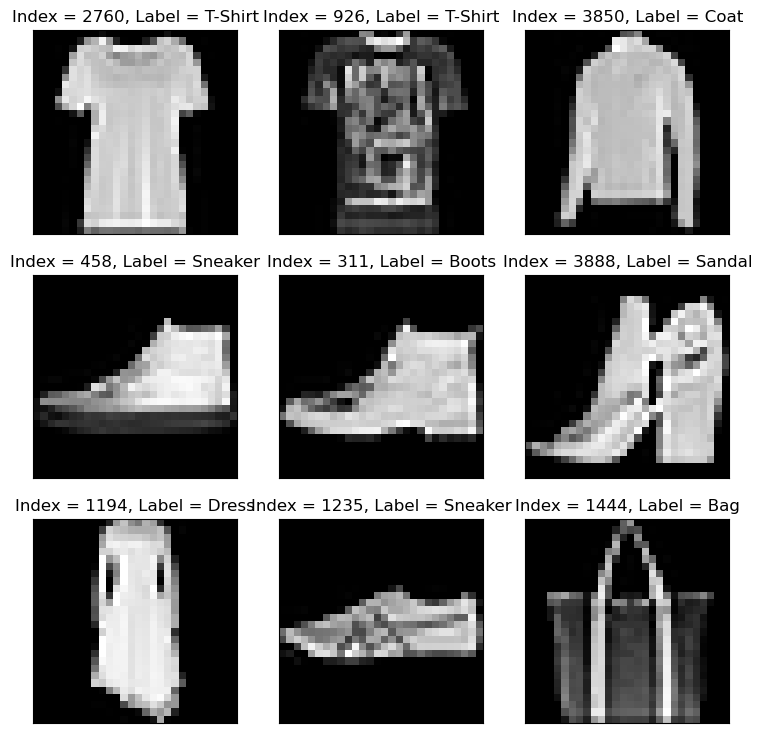

In [9]:
# Plot the Data

hF = PlotMnistImages(mXTrain, vYTrain, numImg, lClasses = L_CLASSES)

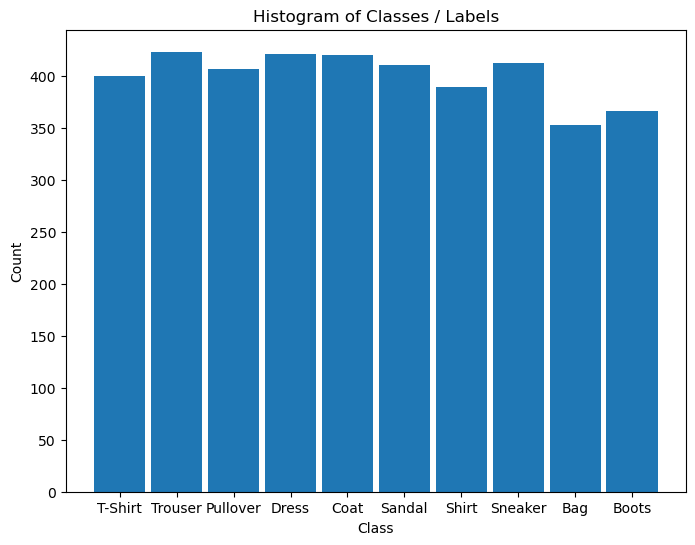

In [10]:
# Plot the Histogram of Classes

hA = PlotLabelsHistogram(vYTrain)
hA.set_xticks(range(len(L_CLASSES)))
hA.set_xticklabels(L_CLASSES)
plt.show()

## Train Linear SVM Classifier

The _Linear SVM_ will function as the baseline classifier.

In [11]:
# SVM Linear Model
#===========================Fill This===========================#
# 1. Construct a baseline model (Linear SVM).
# 2. Train the model.
# 3. Score the model (Accuracy). Keep result in a variable named `modelScore`.
svm_linear = SVC(C = paramC, kernel = kernelType).fit(mXTrain, vYTrain)
modelScore = svm_linear.score(mXTest, vYTest)
#===============================================================#

print(f'The model score (Accuracy) on the data: {modelScore:0.2%}') #<! Accuracy

The model score (Accuracy) on the data: 79.30%


## Train Kernel SVM

In this section we'll train a Kernel SVM. We'll find the optimal kernel and other hyper parameters by cross validation.  
In order to optimize on the following parameters: `C`, `kernel` and `gamma` we'll use [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  
The idea is iterating over the grid of parameters of the model to find the optimal one.  
Each parameterized model is evaluated by a Cross Validation.

In order to use it we need to define:
 - The Model (`estimator`) - Which model is used.
 - The Parameters Grid (`param_grid`) - The set of parameter to try.
 - The Scoring (`scoring`) - The score used to define the best model.
 - The Cross Validation Iterator (`cv`) - The iteration to validate the model.


* <font color='brown'>(**#**)</font> Pay attention to the expected run time. Using `verbose` is useful.
* <font color='brown'>(**#**)</font> This is a classic grid search which is not the most efficient policy. There are more advanced policies.
* <font color='brown'>(**#**)</font> The `GridSearchCV()` is limited to one instance of an estimator.  
  Yet using Pipelines we may test different types of estimators.

In [16]:
# Construct the Grid Search object 

#===========================Fill This===========================#
# 1. Set the parameters to iterate over and their values.
dParams = {
            'C' : [1,2,3,4],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma' : ["scale", "auto"],
            }
#===============================================================#

oGsSvc = GridSearchCV(estimator = SVC(), param_grid = dParams, scoring = None, cv = numFold, verbose = 4,n_jobs=4)

TODO

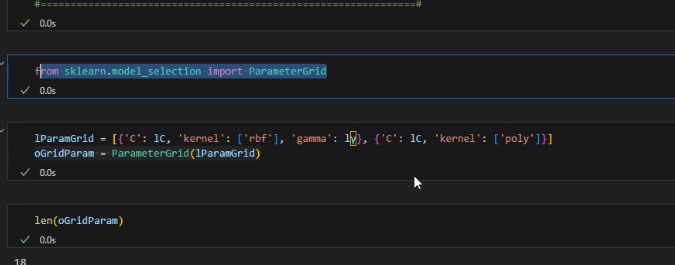

### see also using ParameterGrid 

In [25]:
from sklearn.model_selection import ParameterGrid

lParamGrid = list(ParameterGrid(dParams))
print(f'The number of parameter combinations: {len(lParamGrid)}')
lParamGrid[2]


The number of parameter combinations: 32


{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

* <font color='brown'>(**#**)</font> You may want to have a look at the `n_jobs` parameter.

## run

In [17]:
# Hyper Parameter Optimization
# Training the model with each combination of hyper parameters.

#===========================Fill This===========================#
# 1. The model trains on the train data using Stratified K Fold cross validation.
oGsSvc = oGsSvc.fit(mXTrain, vYTrain) #<! It may take few minutes
#===============================================================#

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[CV 1/5] END ...C=1, gamma=scale, kernel=linear;, score=0.820 total time=   5.4s
[CV 3/5] END ...C=1, gamma=scale, kernel=linear;, score=0.816 total time=   5.4s
[CV 4/5] END ...C=1, gamma=scale, kernel=linear;, score=0.823 total time=   5.6s
[CV 2/5] END ...C=1, gamma=scale, kernel=linear;, score=0.841 total time=   5.7s
[CV 5/5] END ...C=1, gamma=scale, kernel=linear;, score=0.828 total time=   2.5s
[CV 1/5] END .....C=1, gamma=scale, kernel=poly;, score=0.787 total time=   2.8s
[CV 2/5] END .....C=1, gamma=scale, kernel=poly;, score=0.794 total time=   2.6s
[CV 3/5] END .....C=1, gamma=scale, kernel=poly;, score=0.779 total time=   4.1s
[CV 5/5] END .....C=1, gamma=scale, kernel=poly;, score=0.807 total time=   2.2s
[CV 4/5] END .....C=1, gamma=scale, kernel=poly;, score=0.786 total time=   3.2s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.841 total time=   3.1s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.849 total time=   3.7s
[CV 3/5] END ......C=1, gamm

In [18]:
# Best Model
# Extract the attributes of the best model.

#===========================Fill This===========================#
# 1. Extract the best score.
# 2. Extract a dictionary of the parameters.
# !! Use the attributes of the `oGsSvc` object.
bestScore   = oGsSvc.best_score_
dBestParams = oGsSvc.best_params_
#===============================================================#

print(f'The best model had the following parameters: {dBestParams} with the CV score: {bestScore:0.2%}')


The best model had the following parameters: {'C': 4, 'gamma': 'scale', 'kernel': 'rbf'} with the CV score: 86.23%


* <font color='brown'>(**#**)</font> In production one would visualize the effect of each parameter on the model result. Then use it to fine tune farther the parameters.

In [27]:
oGsSvc.score(mXTest, vYTest) ## will be the same like extracting best model

0.85

In [20]:
# The Best Model

#===========================Fill This===========================#
# 1. Extract the best model.
# 2. Score the best model on the test data set.
bestModel = oGsSvc.best_estimator_
modelScore = bestModel.score(mXTest, vYTest)
#===============================================================#

print(f'The model score (Accuracy) on the data: {modelScore:0.2%}') #<! Accuracy

The model score (Accuracy) on the data: 85.00%


* <font color='brown'>(**#**)</font> With proper tuning one can improve the baseline model by `~5%`.

### Train the Best Model on the Train Data Set

In production we take the optimal Hyper Parameters and then retrain the model on the whole training data set.  
This is the model we'll use in production.


In [21]:
# The Model with Optimal Parameters

#===========================Fill This===========================#
# 1. Construct the model.
# 2. Train the model.
oSvmCls = bestModel.fit(mXTrain, vYTrain)
#===============================================================#

modelScore = oSvmCls.score(mXTest, vYTest)

print(f'The model score (Accuracy) on the data: {modelScore:0.2%}') #<! Accuracy

The model score (Accuracy) on the data: 85.00%


* <font color='red'>(**?**)</font> Is the value above exactly as the value from the best model of the grid search? If so, look at the `refit` parameter of `GridSearchCV`.

## Performance Metrics / Scores

In this section we'll analyze the model using the _confusion matrix_.

### Plot the Confusion Matrix

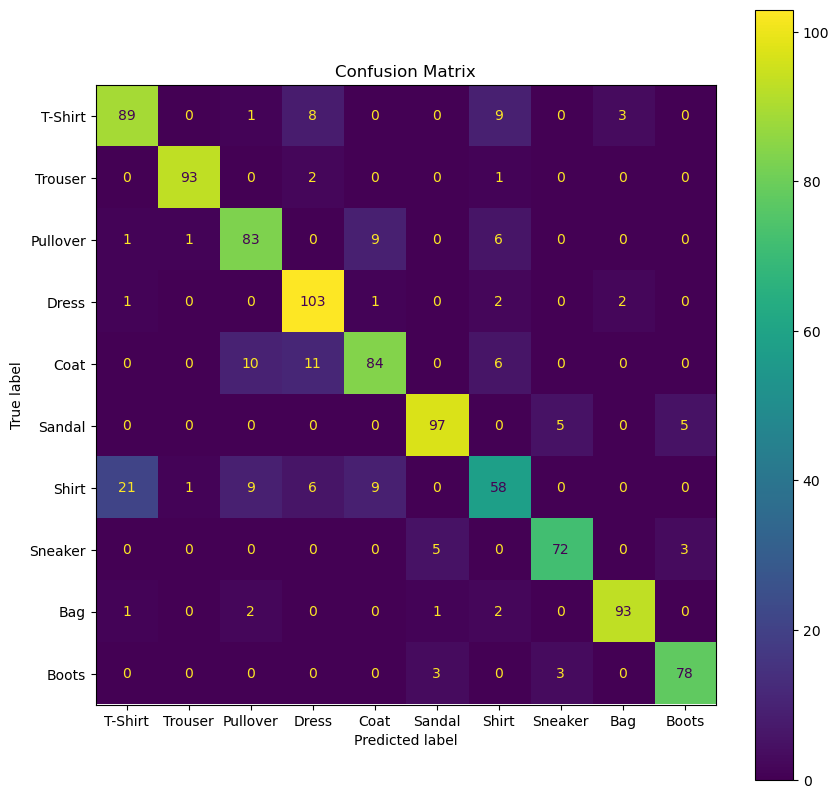

In [28]:
# Plot the Confusion Matrix
hF, hA = plt.subplots(figsize = (10, 10))

#===========================Fill This===========================#
# 1. Plot the confusion matrix for the best model.
# 2. Use the data labels (`L_CLASSES`).
hA, mConfMat = PlotConfusionMatrix(vYTest, oSvmCls.predict(mXTest),lLabels= L_CLASSES, hA = hA)
#===============================================================#

plt.show()

* <font color='red'>(**?**)</font> Which class has the best accuracy?
* <font color='red'>(**?**)</font> Which class has a dominant false prediction? Does it make sense?
* <font color='red'>(**?**)</font> What's the difference between $p \left( \hat{y}_{i} = \text{coat} \mid {x}_{i} = \text{coat} \right)$ to $p \left( {y}_{i} = \text{coat} \mid \hat{y}_{i} = \text{coat} \right)$?

recall and presicion

* <font color='blue'>(**!**)</font> Make the proper calculations on `mConfMat` or the function `PlotConfusionMatrix` to answer the questions above.

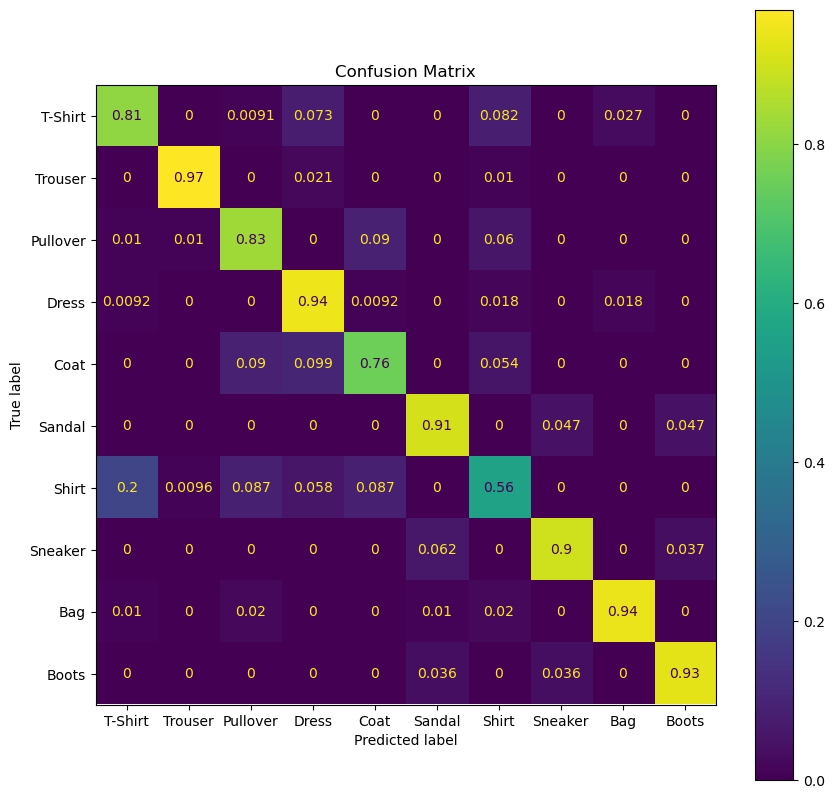

In [30]:
# Plot the Confusion Matrix
hF, hA = plt.subplots(figsize = (10, 10))

#===========================Fill This===========================#
# 1. Plot the confusion matrix for the best model.
# 2. Use the data labels (`L_CLASSES`).
hA, mConfMat = PlotConfusionMatrix(vYTest, oSvmCls.predict(mXTest),lLabels= L_CLASSES,normMethod= 'true' , hA = hA)
#===============================================================#

plt.show()